<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gleichungen-mit-Parameter" data-toc-modified-id="Gleichungen-mit-Parameter-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gleichungen mit Parameter</a></span><ul class="toc-item"><li><span><a href="#Lambert-W" data-toc-modified-id="Lambert-W-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lambert W</a></span></li><li><span><a href="#Polynomielle-Gleichungen" data-toc-modified-id="Polynomielle-Gleichungen-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Polynomielle Gleichungen</a></span></li></ul></li><li><span><a href="#Ungleichungen" data-toc-modified-id="Ungleichungen-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Ungleichungen</a></span></li><li><span><a href="#Gleichungssysteme" data-toc-modified-id="Gleichungssysteme-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gleichungssysteme</a></span><ul class="toc-item"><li><span><a href="#Lineare-Gleichungssysteme" data-toc-modified-id="Lineare-Gleichungssysteme-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Lineare Gleichungssysteme</a></span></li><li><span><a href="#Nichtlineare-Gleichungssysteme" data-toc-modified-id="Nichtlineare-Gleichungssysteme-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Nichtlineare Gleichungssysteme</a></span></li></ul></li><li><span><a href="#Python-rechnet-komplex" data-toc-modified-id="Python-rechnet-komplex-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Python rechnet komplex</a></span><ul class="toc-item"><li><span><a href="#Imaginäre-Einheit" data-toc-modified-id="Imaginäre-Einheit-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Imaginäre Einheit</a></span></li><li><span><a href="#Real--und-Imaginärteil" data-toc-modified-id="Real--und-Imaginärteil-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Real- und Imaginärteil</a></span></li></ul></li><li><span><a href="#Vereinfachungen-(simplify)-vgl.-Lektion-1" data-toc-modified-id="Vereinfachungen-(simplify)-vgl.-Lektion-1-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Vereinfachungen (simplify) vgl. Lektion 1</a></span><ul class="toc-item"><li><span><a href="#Faktorisieren-(factor)-und-ausmultiplizieren-(expand)" data-toc-modified-id="Faktorisieren-(factor)-und-ausmultiplizieren-(expand)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Faktorisieren (factor) und ausmultiplizieren (expand)</a></span></li><li><span><a href="#&quot;cancel&quot;-bringt-rationale-Ausdrücke-in-gekürzte-Standardform" data-toc-modified-id="&quot;cancel&quot;-bringt-rationale-Ausdrücke-in-gekürzte-Standardform-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>"cancel" bringt rationale Ausdrücke in gekürzte Standardform</a></span></li><li><span><a href="#Zusammenfassen-(collect)" data-toc-modified-id="Zusammenfassen-(collect)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Zusammenfassen (collect)</a></span></li><li><span><a href="#Partialbruchzerlegung" data-toc-modified-id="Partialbruchzerlegung-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Partialbruchzerlegung</a></span></li><li><span><a href="#trigsimp-und-powsimp" data-toc-modified-id="trigsimp-und-powsimp-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>trigsimp und powsimp</a></span></li></ul></li><li><span><a href="#Umformungen-(rewrite)" data-toc-modified-id="Umformungen-(rewrite)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Umformungen (rewrite)</a></span></li></ul></div>

# Lektion 8

## Gleichungen mit Parameter

In [1]:
from sympy import *
init_printing()
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
x, y, z, a, b, c, d = symbols('x y z a b c d')

In [2]:
solve(Eq(x**2, a), x)

### Lambert W

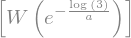

In [3]:
solve(Eq(exp(-a*x), 3*x**a), x)

In [4]:
solveset(Eq(exp(-a*x), 3*x**a), x)

In [5]:
sol = solve(Eq(x*exp(x), y), x) 
sol

Die Lambert W-Funktion ist die Umkehrfunktion von x*exp(x)

In [6]:
sol[0].subs(y, 1).n()

In [7]:
soln = lambdify(y, sol[0])
soln

<function _lambdifygenerated(y)>

In [8]:
soln(1)

NameError: name 'LambertW' is not defined

Scipy:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lambertw.html#scipy.special.lambertw

Allgemeine Information:
https://en.wikipedia.org/wiki/Lambert_W_function

In [9]:
from scipy.special.lambertw import lambertw
soln = lambdify(y, sol[0], modules={'LambertW' : lambertw})
soln(1)

(0.5671432904097838+0j)

In [10]:
xn = np.linspace(-1, 2, 100)
yn = soln(xn)
plt.plot(xn, yn.real, xn, yn.imag);

### Polynomielle Gleichungen 

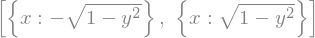

In [11]:
gl = Eq(x**2+y**2, 1)
sol1 = solve(gl)
sol1

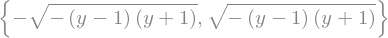

In [12]:
sol2 = solveset(gl, x)
sol2

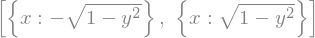

In [13]:
sol1

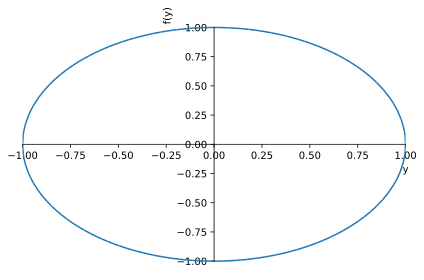

AttributeError: 'list' object has no attribute 'set_aspect'

In [14]:
pl = plot(sol1[0][x], sol1[1][x], (y, -1, 1))
pl._backend.ax.set_aspect('equal') 

In [ ]:
pl1 = plot(sol1[0][x], (y, -1, 1), show = False)
pl2 = plot(sol1[1][x], (y, -1, 1), show = False)
pl1.extend(pl2)
pl1[1].line_color='red'
pl1.legend = True
pl1.show()
pl1._backend.ax.set_aspect('equal')

In [ ]:
sol2

In [ ]:
pl1 = plot(sol2[0], (y, -1, 1), show = False)
pl2 = plot(sol2[1], (y, -1, 1), show = False)
pl1.extend(pl2)
pl1[1].line_color='red'
pl1.legend = True
pl1.show()
pl1._backend.ax.set_aspect('equal')

In [ ]:
pl = plot(0,(y, -1, 1), show = False)
for sol in sol2:
    pl.extend(plot(sol, (y, -1, 1), show = False))
pl[1].line_color='red'
pl.legend = True
pl.show()
pl._backend.ax.set_aspect('equal')

In [ ]:
gl = Eq(x*y, 0)
sol1 = solve(gl)
sol1

In [ ]:
gl = Eq(x*y, 0)
sol1 = solveset(gl, x)
sol1

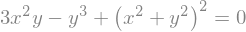

In [15]:
gl = Eq((x**2 + y**2)**2 + 3*x**2*y - y**3, 0)
sols = solve(gl)
sols
gl

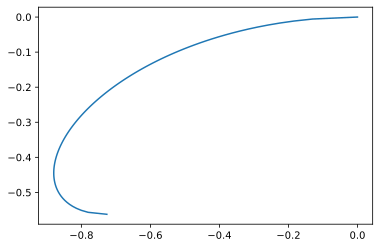

In [16]:
yn = np.linspace(-9/16, 0, 100)
fig = plt.figure()
ax = fig.gca()
ax.plot(lambdify(y, sols[0][x])(yn), yn)

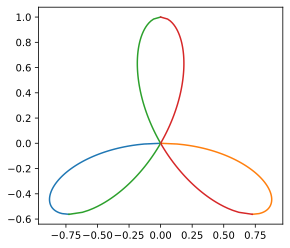

In [17]:
fig = plt.figure()
ax = fig.gca()
for i, sol in enumerate(sols):
    if i in [2, 3]:
        yn = np.linspace(-9/16, 1, 100)
    else:
        yn = np.linspace(-9/16, 0, 100)
    ax.plot(lambdify(y, sol[x])(yn), yn) 
ax.set_aspect('equal')

einfacher

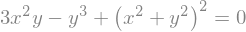

In [18]:
gl

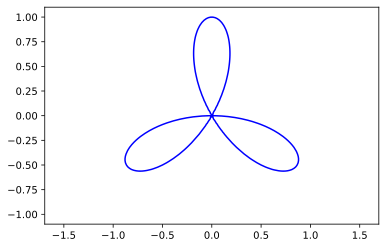

In [19]:
fig = plt.figure()
ax = fig.gca()
xn = np.linspace(-1.1, 1.1, 100)
X,Y = np.meshgrid(xn, xn)
ax.contour(X, Y, lambdify((x, y), gl.lhs)(X, Y), [0], colors='blue')
ax.axis('equal');

## Ungleichungen

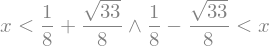

In [20]:
f = x**2 - x -2
g = -3*x**2
sol = solve(f<g)
sol

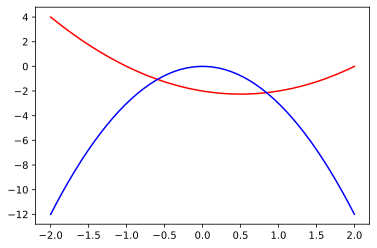

In [21]:
fig = plt.figure()
ax = fig.gca()
xn = np.linspace(-2,2)
ax.plot(xn, lambdify(x, f)(xn), 'r')
ax.plot(xn, lambdify(x, g)(xn), 'b');

In [22]:
sol.subs(x, 1)

In [23]:
solI = sol.as_set()  # Lösungsintervall
solI 

In [24]:
type(solI)

sympy.sets.sets.Interval

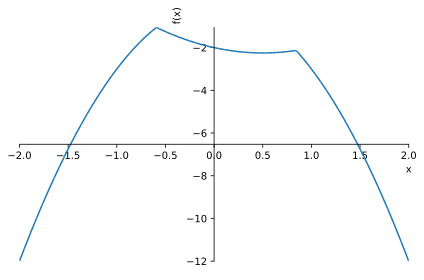

In [25]:
p1 = Piecewise((f, sol), (g, True))
plot(p1, (x, -2, 2))

In [26]:
p2 = Piecewise((f, sol.as_set().contains(x)), (g, True))
plot(p2, (x, -2, 2))

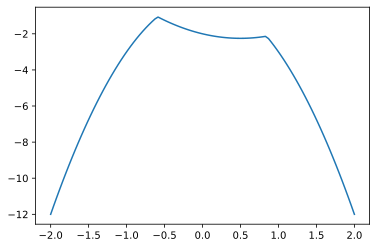

In [27]:
pn = lambdify(x, p1)
xn = np.linspace(-2, 2, 100)
plt.figure()
plt.plot(xn, pn(xn))

In [28]:
sols = solveset(f>g) 

NotImplementedError: 
Inequalities in the complex domain are not supported. Try the real
domain by setting domain=S.Reals

In [32]:
sols = solveset(f>g, domain = S.Reals)
sols  # Lösungsmenge, Vereinigung von zwei Intervallen

In [33]:
f = sin(x)
g = cos(x)
sols = solveset(f>g, x, domain = S.Reals)  
sols  # da fehlt was

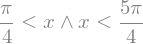

In [34]:
sol = solve(sin(x)>cos(x), x)
sol

## Gleichungssysteme

In [35]:
x = symbols('x:2')
x

### Lineare Gleichungssysteme

In [36]:
glL = [Eq(x[0]+x[1], a), Eq(2*x[0]-b*x[1], 3)] 
glL 

In [37]:
glT = (Eq(x[0]+x[1], a), Eq(2*x[0]-b*x[1], 3)) 
glS = {Eq(x[0]+x[1], a), Eq(2*x[0]-b*x[1], 3)}

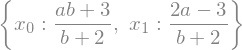

In [38]:
sol = solve(glT, (x[0], x[1]))
sol

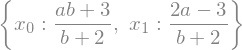

In [39]:
sol = solve(glS, x)
sol

In [40]:
linsolve(glT, x), linsolve(glL, x) #, linsolve(glS, x)

### Nichtlineare Gleichungssysteme

In [41]:
gn = (Eq(x[0]**2+x[1]**2-1,0),Eq(x[0]-x[1],0))
gn

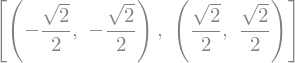

In [42]:
lsg = solve(gn,x)
lsg

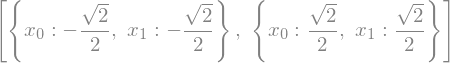

In [43]:
lsgdict = [{x[j]: l[j]  for j in range(2)} for l in lsg]
lsgdict

In [44]:
[gl.subs(l) for l in lsgdict for gl in gn ]

In [45]:
gn[0].lhs 

In [46]:
gn[1]

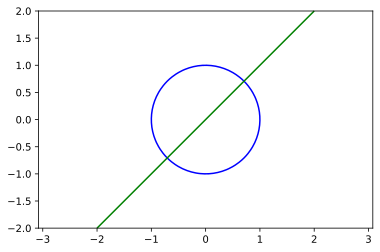

In [47]:
xn = np.linspace(-2, 2, 100)
X0, X1 = np.meshgrid(xn, xn)
fig = plt.figure()
ax = fig.gca()
ax.contour(X0, X1, lambdify(x, gn[0].lhs)(X0, X1), [0], colors='blue')
ax.contour(X0, X1, lambdify(x, gn[1].lhs)(X0, X1), [0], colors='green')
ax.axis('equal');

In [48]:
f = x[0]**2+x[1]**2+3*x[0]**2*x[1]-x[1]**3
g = x[0]**2+x[1]**2
f, g

In [49]:
xn = np.linspace(-3, 3, 101)
X0, X1 = np.meshgrid(xn, xn)
fig = plt.figure()
ax = fig.gca()
ax.contour(X0, X1, lambdify(x, f)(X0, X1), [1], colors='blue')
ax.contour(X0, X1, lambdify(x, g)(X0, X1), [4], colors='red')
ax.axis('equal');
ax.grid()

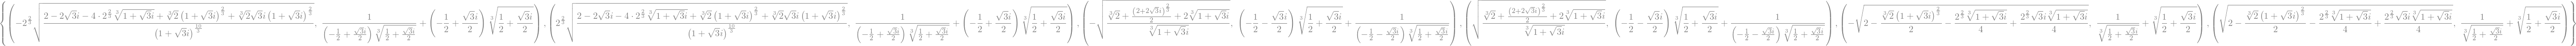

In [50]:
sol1 = nonlinsolve((f, g-4), x)
sol1

In [51]:
for l in sol1:
    print('x_0 : ', l[0].n(), 'x_1 : ', l[1].n())

x_0 :  0.684040286651337 + 0.e-24*I x_1 :  1.87938524157182 + 0.e-20*I
x_0 :  -0.684040286651337 - 1.18091519273054e-26*I x_1 :  1.87938524157182 + 0.e-20*I
x_0 :  1.96961550602442 + 0.e-21*I x_1 :  -0.347296355333861 - 0.e-22*I
x_0 :  -1.96961550602442 x_1 :  -0.347296355333861 - 0.e-22*I
x_0 :  1.28557521937308 + 3.24269556573663e-24*I x_1 :  -1.53208888623796 + 0.e-22*I
x_0 :  -1.28557521937308 x_1 :  -1.53208888623796 + 0.e-22*I


In [52]:
sol2 = solve((f-1, g-4))
sol2

In [54]:
for l in sol2:
    x0 = l[x[0]]
    x1 = l[x[1]]
    print('x_0 : {0: 12.9f} + {1: 12.9f} i \t'.format(re(x0).n(), im(x0).n()), \
          'x_1 : {0: 12.9f} + {1: 12.9f} i   '.format(re(x1).n(), im(x1).n()))

TypeError: unsupported format string passed to Zero.__format__

In [55]:
im(sol2[0][x[1]]).n()

In [56]:
for l in sol2:
    x0 = l[x[0]]
    x1 = l[x[1]]
    print('x_0 : {0: 12.9f} + {1: 12.9e} i \t'.format(float(re(x0).n()), float(im(x0).n())), \
          'x_1 : {0: 12.9f} + {1: 12.9e} i   '.format(float(re(x1).n()), float(im(x1).n())))

x_0 : -0.770477482 + -2.817295628e-165 i 	 x_1 :  1.845633888 +  0.000000000e+00 i   
x_0 :  0.770477482 +  2.817295628e-165 i 	 x_1 :  1.845633888 +  0.000000000e+00 i   
x_0 : -1.213127093 + -1.497356852e-22 i 	 x_1 : -1.590070016 +  3.693191447e-127 i   
x_0 :  1.213127093 +  2.994713704e-22 i 	 x_1 : -1.590070016 +  3.693191447e-127 i   
x_0 :  1.983604574 + -2.994713704e-22 i 	 x_1 : -0.255563872 + -1.846595724e-127 i   
x_0 : -1.983604574 +  5.989427409e-22 i 	 x_1 : -0.255563872 + -1.846595724e-127 i   


## Python rechnet komplex

### Imaginäre Einheit

In [57]:
x, y = symbols('x y')
z = x + I*y
z

In [58]:
z**4

### Real- und Imaginärteil

In [59]:
abs(z)

In [60]:
re(z**4).expand() 

?

In [61]:
re(z)

In [62]:
im(z)

In [63]:
x, y = symbols('x y', real=True)
z = x + I*y

In [64]:
re(z**4).expand()

In [65]:
abs(z)

## Vereinfachungen (simplify) vgl. Lektion 1

In [66]:
t = sin(x)**2 + cos(x)**2
t

In [67]:
simplify(t)

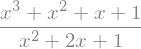

In [68]:
r = (x**3 + x**2 +x +1) / (x**2 +2* x +1)
r

In [69]:
simplify(r)

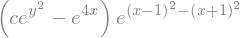

In [70]:
ex = exp((x-1)**2+log(c*exp(y**2)-exp(4*x))-(x+1)**2)
ex

In [71]:
simplify(ex)

In [72]:
p = x**2 + 2*x + 1

In [73]:
simplify(p)

### Faktorisieren (factor) und ausmultiplizieren (expand)

In [74]:
pf = factor(p)
pf

In [75]:
q = expand(pf)
q

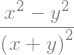

In [76]:
r = (x**2-y**2)/(x+y)**2
r

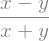

In [77]:
factor(r)

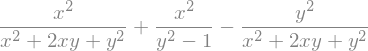

In [78]:
r1 = expand(r) + x**2/(y**2-1)
r1

In [79]:
together(r1)

### "cancel" bringt rationale Ausdrücke in gekürzte Standardform

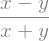

In [80]:
cancel(r)

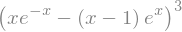

In [81]:
g = (x*exp(-x)-(x-1)*exp(x))**3
g

In [82]:
g = expand(g)
g

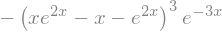

In [83]:
factor(g)

In [84]:
simplify(g)

### Zusammenfassen (collect)

In [85]:
collect(g, x)

In [86]:
collect(g, exp(x))

In [87]:
collect(g, exp(x), exact=True)

In [88]:
collect(g, x**2, exact=True)

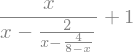

In [89]:
k = 1+x/(x -2/(x-4/(8-x))) # Kettenbruch
k

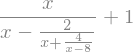

In [90]:
simplify(k)

In [91]:
cancel(k)

### Partialbruchzerlegung

In [92]:
r = (x*y+2*x+1)/(x**2-3*x+1)
r

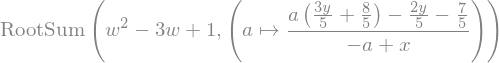

In [93]:
r = apart(r, x, full=True) #Partialbruchzerlegung
r

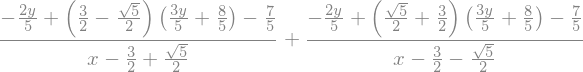

In [94]:
rr = r.doit()
rr

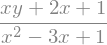

In [95]:
cancel(rr)

### trigsimp und powsimp

In [96]:
f = sin(x)**4 - 2*sin(x)**2*cos(x)**2 + cos(x)**4
f

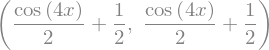

In [97]:
simplify(f), trigsimp(f) 

In [98]:
simplify(sinh(x)**2+cosh(x)**2), trigsimp(sinh(x)**2+cosh(x)**2)

In [99]:
expand(cos(x+y))

In [100]:
expand_trig(cos(x+y))

In [101]:
expand_trig(sinh(x+y))

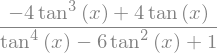

In [102]:
f = expand_trig(tan(4*x))
f

In [103]:
trigsimp(f)

In [104]:
simplify(x**a*x)

In [105]:
powsimp(x**a*x**b)

In [106]:
f = x**a*x*sin(x)/cos(x)
trigsimp(f)

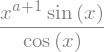

In [107]:
powsimp(f)

In [108]:
simplify(f)

## Umformungen (rewrite)


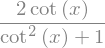

In [109]:
sin(2*x).rewrite(cot)

In [110]:
sin(2*x).rewrite(cos)

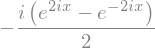

In [111]:
sin(2*x).rewrite(exp)

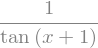

In [112]:
cot(x+1).rewrite(tan)

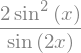

In [113]:
tan(x).rewrite(sin)

In [114]:
x = symbols('x', positive=True)

In [115]:
besselj(Rational(1,2), x).rewrite(sin) # Schade

In [116]:
plot(besselj(Rational(1, 2), x) - sin(x)*sqrt(2/pi/x), (x, 0, 2));

In [117]:
simplify(besselj(Rational(1, 2), x) - sin(x)*sqrt(2/pi/x))

In [118]:
gamma(4)  # Verallgemeinerung von Fakultät  gamma(n+1) = n! für natürliche Zahlen

In [119]:
gamma(5)

In [120]:
f = gamma(x)*gamma(x+Rational(1,2)) - 2**(1-2*x)*sqrt(pi)*gamma(2*x)
f

In [121]:

simplify(f)